In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Wine.csv")

In [26]:
df.keys()

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [27]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [28]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [29]:
print(df.isnull().sum())  

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [30]:
X = df.drop('Customer_Segment', axis=1)  # Features
y = df['Customer_Segment']  # Target variable

### Accuracy Before Applying PCA

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 1, 3,
       2, 3, 3, 2, 3, 2, 2, 1, 1, 2, 1, 3, 2, 2], dtype=int64)

### Accuracy before applying PCA

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

### Apply PCA

In [36]:
for col in X.columns:
    sc = StandardScaler()                                     #Standardize features by removing the mean and scaling to unit variance.z = (x - u) / s  mean=0, Stddeviation=1
    X[col] = sc.fit_transform(X[[col]])                        #Fit to data, then transform it.Compute the mean and std to be used for later scaling.

In [37]:
X.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [38]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [39]:
explained_variance_ratio = pca.explained_variance_ratio_

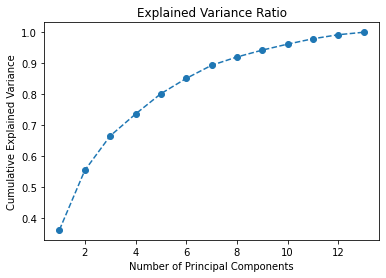

In [40]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [41]:
n_components = 12  # Choose the desired number of principal components you want to reduce a dimention to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


In [42]:
X_pca.shape


(178, 12)

In [43]:
X.shape

(178, 13)

No handles with labels found to put in legend.


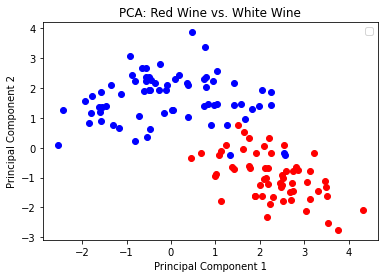

In [45]:
red_indices = y[y == 1].index
white_indices = y[y == 2].index

plt.scatter(X_pca[red_indices, 0], X_pca[red_indices, 1], c='red',)
plt.scatter(X_pca[white_indices, 0], X_pca[white_indices, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Red Wine vs. White Wine')
plt.show()

In [46]:
#Conclusion: Here we have reduce the dimention now we can able to apply any algorithm like classification, Regression etc.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_pca,y,test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test)
y_pred

array([1, 3, 3, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 1, 3, 1, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 3, 1, 3, 3, 1, 1], dtype=int64)

In [50]:
y_test

20     1
149    3
139    3
9      1
154    3
168    3
163    3
17     1
124    2
161    3
155    3
98     2
109    2
128    2
16     1
140    3
43     1
87     2
75     2
153    3
84     2
82     2
80     2
176    3
122    2
85     2
152    3
173    3
61     2
117    2
164    3
38     1
158    3
167    3
30     1
53     1
Name: Customer_Segment, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0